In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
from pylab import *
import numpy as np

In [2]:
!ls -l

img_name = "scale_1200.png"

try:
    img = Image.open(img_name)
except IOError:
    print("не могу преобразовать")

total 15080
-rw-r--r--@ 1 fedor  staff  4301381 30 ноя 17:04 2B.png
-rw-r--r--  1 fedor  staff  1437221 30 ноя 18:10 PillowScratch.ipynb
-rw-r--r--@ 1 fedor  staff   977266 30 ноя 19:58 scale_1200.png
-rw-r--r--@ 1 fedor  staff   160601 30 ноя 14:03 scrat.jpg
-rw-r--r--@ 1 fedor  staff   791488 30 ноя 17:10 scrat2.png


In [3]:
def showImage(img, title=""):
    plt.figure(figsize=(4,7), dpi=100)
    plt.title(title)
    imgplot = plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()
    
def get_imglist(path):
    """ Возвращает список имен всех jpg-файлов в каталоге"""
    return [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]


def compute_average(imglist):
    """ Вычислить среднее списка изображений """
    
    # открыть первое изображение и преобразовать его в массив типа float
    averageim = array(Image.open(imglist[0]), 'f')
    
    for imname in imglist[1:]:
        try:
            aveerageim += array(Image.open(imname))
        except:
            print(imname + '... пропущено')
            averageim /= len(imglist)
            
    return array(averageim, 'uint8')



# get_imglist("./") # -> ['./scrat.jpg']

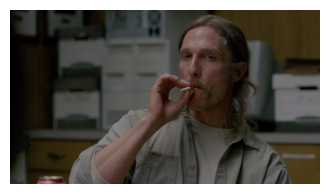

In [4]:
showImage(img)

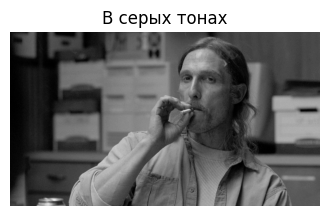

In [5]:
showImage(img.convert("L"), "В серых тонах")

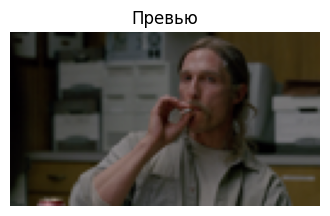

In [6]:
thumbnail = img.copy()
thumbnail.thumbnail((128, 128))

showImage(thumbnail, "Превью")

In [7]:
box = (200, 840, 640, 1300)
region = img.crop(box)

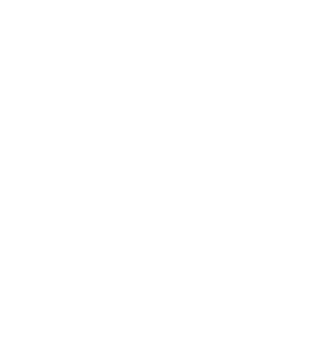

In [8]:
showImage(region)

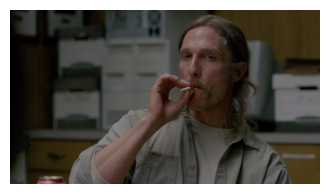

In [9]:
region = region.transpose(Image.ROTATE_180)
img_changed = img.copy()
img_changed.paste(region, (200, 830, 640, 1290))
showImage(img_changed)

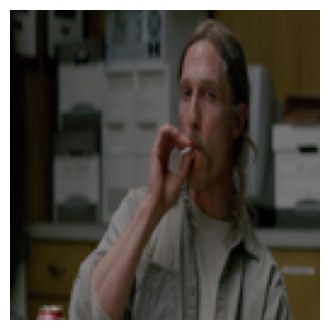

In [10]:
out = img.resize((128, 128))
showImage(out)

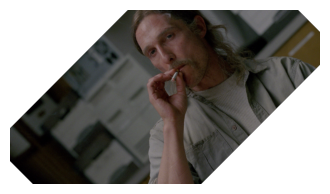

In [11]:
out = img.rotate(45)
showImage(out)

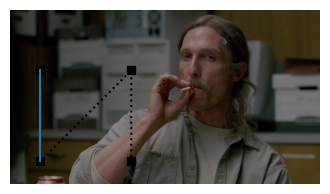

In [12]:
im = array(Image.open(img_name))

x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

plt.figure(figsize=(4,7), dpi=100)
plt.plot(x, y, 'ks:')
plt.plot(x[:2], y[:2])
plt.axis("off")

plt.imshow(im)

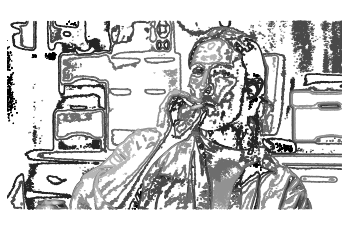

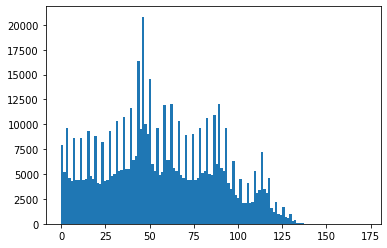

In [13]:
im = array(Image.open(img_name).convert("L"))

# Создать новый рисунок
figure()

# не использовать цвета
gray()

# Показать линиии относительно левого верхнего угла
contour(im, origin='image')
axis('equal')
axis('off')

figure()
hist(im.flatten(), 128)
show()

<Figure size 432x288 with 0 Axes>

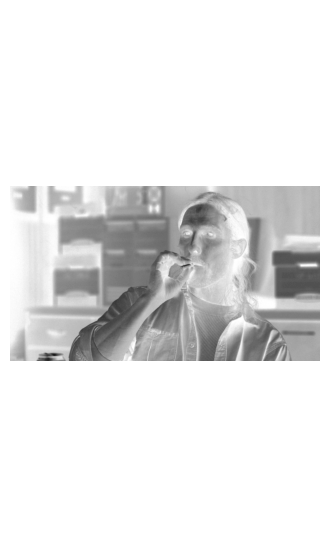

<Figure size 432x288 with 0 Axes>

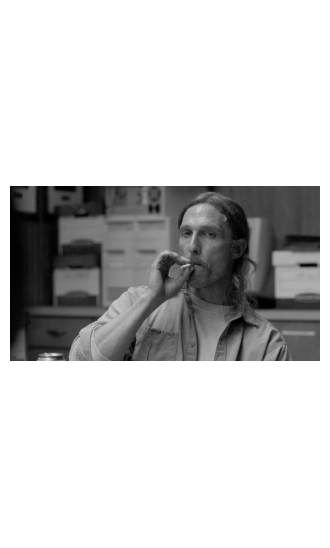

In [28]:
figure("Инвертированное изображение")
plt.figure(figsize=(4,7), dpi=100)
plt.axis('equal')
plt.axis('off')
plt.imshow(255 - im, cmap="gray")

figure("Приведённое к интервалу [100, 200]")
plt.figure(figsize=(4,7), dpi=100)
plt.axis('equal')
plt.axis('off')
plt.imshow(100 / 255 * im + 100, cmap="gray")

figure("с квадратичной функция")
plt.figure(figsize=(4,7), dpi=100)
plt.axis('equal')
plt.axis('off')
plt.imshow(255 * (im / 255) ** 2, cmap="gray")

In [15]:
def histeq(im, n_bins=256):
    
    imhist, bins = np.histogram(im.flatten(), n_bins, density=True)
    cdf = imhist.cumsum()     # Функция распределения
    cdf = 255 * cdf / cdf[-1] # Нормировать
    
    im_ = np.interp(im.flatten(), bins[:-1], cdf)
    
    return im_.reshape(im.shape), cdf

<Figure size 432x288 with 0 Axes>

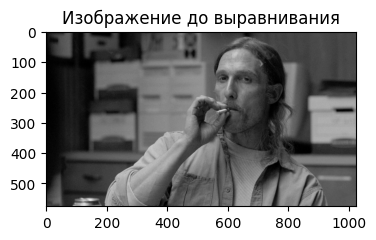

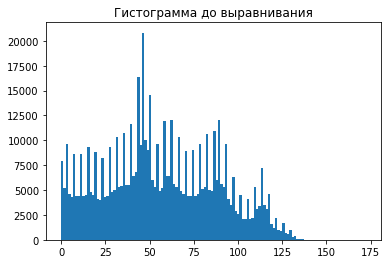

In [16]:
im = np.array(Image.open(img_name).convert("L"))

figure()
plt.figure(figsize=(4,7), dpi=100)
title("Изображение до выравнивания")
plt.gray()
plt.imshow(im)

figure()
title("Гистограмма до выравнивания")
plt.hist(im.flatten(), 128)

im2, cdf = histeq(im)

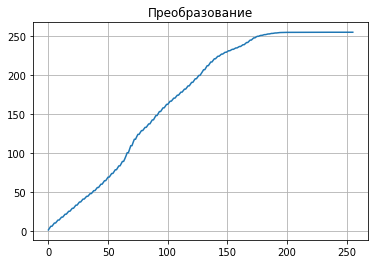

<Figure size 432x288 with 0 Axes>

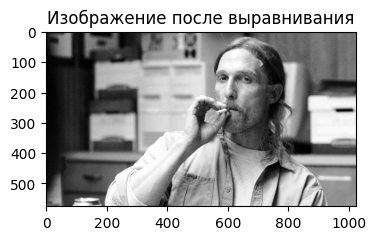

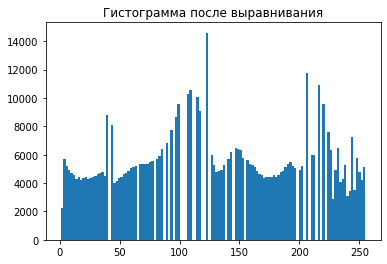

In [17]:
figure()
title("Преобразование")
plt.grid(True)
plt.plot(range(256), cdf)

figure()
plt.figure(figsize=(4,7), dpi=100)
plt.title("Изображение после выравнивания")
plt.gray()
plt.imshow(im2)

figure()
title("Гистограмма после выравнивания")
plt.hist(im2.flatten(), 128)

print()

In [18]:
def pca(x):
    num_data, dim = x.shape
    
    # центрировать данные
    mean_x = x.mean(axis=0)
    x = x - mean_x
    
    if dim > num_data:
        M = dot(x, x.T)
        e, EV = linalg.eigh(M)
        tmp = dot(x.T, EV).T
        V = tmp[::-1]
        S = sqrt(e)[::-1]
        
        for i in range(V.shape[1]):
            V[:, i] /= S
            
    else:
        U,S,V = linalg.svd(x)
        V = V[:num_data]

    return V, S, mean_x
    

In [19]:
immatrix = array([array(Image.open("scrat2.png"))])

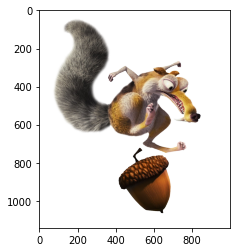

In [20]:
plt.imshow(immatrix[0])

In [21]:
# V, S, mean_x = pca(immatrix)

In [22]:
# Размытие изображений
from scipy.ndimage import filters

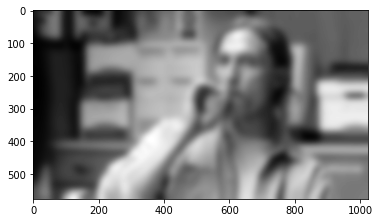

In [23]:
im = array(Image.open(img_name).convert("L"))
img2 = filters.gaussian_filter(im, 10)
plt.imshow(img2)

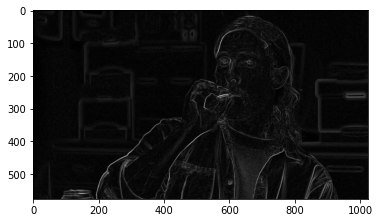

In [24]:
# Операторы Собеля
imx = zeros(im.shape)
filters.sobel(im, 1, imx)

imy = zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = sqrt(imx**2 + imy**2)
plt.imshow(magnitude)

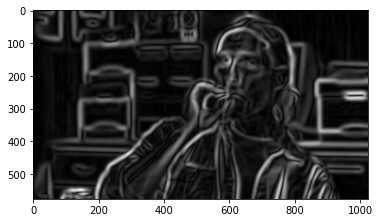

In [25]:
sigma = 5

imx = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx)

imy = zeros(im.shape)
filters.gaussian_filter(im, (sigma, sigma), (1, 0), imy)

magnitude = sqrt(imx**2 + imy**2)
plt.imshow(magnitude)